In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
#load the total neighborhoods worksheet to the dataframe
total_df = pd.read_csv('Total_Neighborhoods.csv')
total_df.head()

C:\Users\Tianshi\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (17,19,22,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PARCEL,Neighborhood,Composite Name,Owned by Trust?,Owned by Business?,SITEADDRESS,SITECITY,SITEZIP,MAILADDRESS,MAIL DIFFERENT FROM SITE?,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,WALLHGT,VIEW
0,5085010022,Beverly Grove,Mark K Nishida Sherman Dale S,No,No,1030 S Dunsmuir Ave,Los Angeles,90019.0,1030 S Dunsmuir Ave,No,...,2.0,0,1,0,0,YES,CENTRAL,CENTRAL,0,0
1,5085033008,Beverly Grove,B Erie & Fay Marshall,No,No,1364 S Ridgeley Dr,Los Angeles,90019.0,1942 E Woodgate Dr,Yes,...,1.0,0,0,0,0,0,0,YES,0,0
2,5085032022,Beverly Grove,Neal S Co Scheindlin Scheindlin & Weisber,No,No,1322 Hauser Blvd,Los Angeles,90019.0,1322 Hauser Blvd,No,...,1.0,0,0,0,0,0,0,YES,0,0
3,5510005006,Beverly Grove,Simi Dabah The Realty Trust,Yes,No,6727 Drexel Ave,Los Angeles,90048.0,2068 Orange Tree Ln #100,Yes,...,5.0,0,1,0,0,YES,0,CENTRAL,0,0
4,5089024002,Beverly Grove,Frances Travassaros Veracka Virginia,No,No,942 S Cochran Ave,Los Angeles,90036.0,942 S Cochran Ave,No,...,1.0,1,0,0,YES,YES,CENTRAL,CENTRAL,0,0


In [4]:
#load the consolidated result worksheet to the dataframe
result_df = pd.read_csv('Consolidated_Results.csv')
result_df.head()

,Original Sort,PARCEL,Neighborhood,Property Type,Full Address,latitude,longitude,Did it sell?,Prediction,Actual,Prediction Result
0,14078,5551015005,Hollywood,Single Famly,"1637 S Orange Grove Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN
1,5793,5070006023,Beverly Grove,Single Famly,"1342 S Redondo Blvd, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN
2,5691,5070009012,Beverly Grove,Single Famly,"1355 Meadowbrook Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN
3,4158,5085036010,Beverly Grove,Single Famly,"1348 S Burnside Ave, Los Angeles, CA 90019",34.049303,-118.354116,1,0.0,1.0,Prediction Incorrect - Sold
4,6060,5085031023,Beverly Grove,Single Famly,"1372 Carmona Ave, Los Angeles, CA 90019",34.049400,-118.357084,1,0.0,1.0,Prediction Incorrect - Sold


In [5]:
#set parcel as index
total = total_df.set_index('PARCEL')
total.head()

,Neighborhood,Composite Name,Owned by Trust?,Owned by Business?,SITEADDRESS,SITECITY,SITEZIP,MAILADDRESS,MAIL DIFFERENT FROM SITE?,MAILCITY,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,WALLHGT,VIEW
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,Beverly Grove,Mark K Nishida Sherman Dale S,No,No,1030 S Dunsmuir Ave,Los Angeles,90019.0,1030 S Dunsmuir Ave,No,Los Angeles,...,2.0,0,1,0,0,YES,CENTRAL,CENTRAL,0,0
5085033008,Beverly Grove,B Erie & Fay Marshall,No,No,1364 S Ridgeley Dr,Los Angeles,90019.0,1942 E Woodgate Dr,Yes,West Covina,...,1.0,0,0,0,0,0,0,YES,0,0
5085032022,Beverly Grove,Neal S Co Scheindlin Scheindlin & Weisber,No,No,1322 Hauser Blvd,Los Angeles,90019.0,1322 Hauser Blvd,No,Los Angeles,...,1.0,0,0,0,0,0,0,YES,0,0
5510005006,Beverly Grove,Simi Dabah The Realty Trust,Yes,No,6727 Drexel Ave,Los Angeles,90048.0,2068 Orange Tree Ln #100,Yes,Redlands,...,5.0,0,1,0,0,YES,0,CENTRAL,0,0
5089024002,Beverly Grove,Frances Travassaros Veracka Virginia,No,No,942 S Cochran Ave,Los Angeles,90036.0,942 S Cochran Ave,No,Los Angeles,...,1.0,1,0,0,YES,YES,CENTRAL,CENTRAL,0,0


In [6]:
#set parcel as index
result = result_df.set_index('PARCEL')
result.head()

,Original Sort,Neighborhood,Property Type,Full Address,latitude,longitude,Did it sell?,Prediction,Actual,Prediction Result
PARCEL,,,,,,,,,,
5551015005,14078,Hollywood,Single Famly,"1637 S Orange Grove Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN
5070006023,5793,Beverly Grove,Single Famly,"1342 S Redondo Blvd, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN
5070009012,5691,Beverly Grove,Single Famly,"1355 Meadowbrook Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN
5085036010,4158,Beverly Grove,Single Famly,"1348 S Burnside Ave, Los Angeles, CA 90019",34.049303,-118.354116,1,0.0,1.0,Prediction Incorrect - Sold
5085031023,6060,Beverly Grove,Single Famly,"1372 Carmona Ave, Los Angeles, CA 90019",34.049400,-118.357084,1,0.0,1.0,Prediction Incorrect - Sold


In [7]:
#merge the two dataframes
final_result = pd.merge(result,total, on='PARCEL')
final_result.head()

,Original Sort,Neighborhood_x,Property Type,Full Address,latitude,longitude,Did it sell?,Prediction,Actual,Prediction Result,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,WALLHGT,VIEW
PARCEL,,,,,,,,,,,,,,,,,,,,,
5551015005,14078,Hollywood,Single Famly,"1637 S Orange Grove Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,0,1,YES,COVERED,YES,0,YES,0,0
5551015005,14078,Hollywood,Single Famly,"1637 S Orange Grove Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,0,1,YES,COVERED,YES,0,YES,0,0
5070006023,5793,Beverly Grove,Single Famly,"1342 S Redondo Blvd, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,1,1,0,0,YES,0,CENTRAL,0,0
5070009012,5691,Beverly Grove,Single Famly,"1355 Meadowbrook Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,0,1,0,0,YES,0,CENTRAL,0,0
5085036010,4158,Beverly Grove,Single Famly,"1348 S Burnside Ave, Los Angeles, CA 90019",34.049303,-118.354116,1,0.0,1.0,Prediction Incorrect - Sold,...,2.0,0,0,0,0,0,CENTRAL,CENTRAL,0,0


In [8]:
#create seller dataframe
final_seller = final_result.loc[final_result['Did it sell?'] == 1]
final_seller.head()

,Original Sort,Neighborhood_x,Property Type,Full Address,latitude,longitude,Did it sell?,Prediction,Actual,Prediction Result,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,WALLHGT,VIEW
PARCEL,,,,,,,,,,,,,,,,,,,,,
5551015005,14078,Hollywood,Single Famly,"1637 S Orange Grove Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,0,1,YES,COVERED,YES,0,YES,0,0
5551015005,14078,Hollywood,Single Famly,"1637 S Orange Grove Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,0,1,YES,COVERED,YES,0,YES,0,0
5070006023,5793,Beverly Grove,Single Famly,"1342 S Redondo Blvd, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,1,1,0,0,YES,0,CENTRAL,0,0
5070009012,5691,Beverly Grove,Single Famly,"1355 Meadowbrook Ave, Los Angeles, CA 90019",NaN,NaN,1,NaN,NaN,NaN,...,3.0,0,1,0,0,YES,0,CENTRAL,0,0
5085036010,4158,Beverly Grove,Single Famly,"1348 S Burnside Ave, Los Angeles, CA 90019",34.049303,-118.354116,1,0.0,1.0,Prediction Incorrect - Sold,...,2.0,0,0,0,0,0,CENTRAL,CENTRAL,0,0


In [9]:
final_seller.describe()

,Original Sort,latitude,longitude,Did it sell?,Prediction,Actual,SITEZIP,PCNTIMPD,TAXAMT,YEARBLT,EFFYRBLT,TOTUNITS,NOSTORY,BEDROOMS,BATHROOMS,FAMILYRM,DININGRM,WALLHGT
count,4869.000000,1217.000000,1217.000000,4869.0,1217.000000,962.0,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.0
mean,19938.638529,34.095562,-118.346762,1.0,0.432210,1.0,90046.538304,26.343192,11588.144477,1951.038201,1954.563155,16.254056,0.605977,2.678990,2.431711,0.054631,0.224071,0.0
std,9899.399640,0.018227,0.031965,0.0,0.495587,0.0,20.387536,21.909772,13936.465777,79.406698,79.422838,38.246838,0.808213,1.215084,1.194907,0.229978,0.417012,0.0
min,18.000000,34.049303,-118.395338,1.0,0.000000,1.0,90004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,12896.000000,34.084305,-118.374307,1.0,0.000000,1.0,90029.000000,0.000000,4379.700000,1926.000000,1928.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0
50%,19838.000000,34.096073,-118.350517,1.0,0.000000,1.0,90046.000000,24.000000,8250.530000,1955.000000,1959.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.0
75%,28301.000000,34.109255,-118.322567,1.0,1.000000,1.0,90068.000000,40.000000,14640.000000,1974.000000,1978.000000,12.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.0
max,36591.000000,34.135288,-118.273150,1.0,1.000000,1.0,90211.000000,99.000000,484104.200000,2015.000000,2015.000000,239.000000,4.000000,11.000000,10.000000,2.000000,1.000000,0.0


In [65]:
final_nonseller.describe()

,Original Sort,latitude,longitude,Did it sell?,Prediction,Actual,SITEZIP,PCNTIMPD,TAXAMT,YEARBLT,EFFYRBLT,TOTUNITS,NOSTORY,BEDROOMS,BATHROOMS,FAMILYRM,DININGRM,WALLHGT
count,33273.000000,8321.000000,8321.000000,33273.0,8321.000000,7057.0,33273.000000,33273.000000,33273.000000,33273.000000,33271.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.0
mean,18041.230217,34.092071,-118.346975,0.0,0.343468,0.0,90039.603372,27.011210,9824.623851,1946.433595,1949.592167,14.925645,0.635004,2.799567,2.402428,0.059658,0.269678,0.0
std,10554.349294,0.021929,0.030999,0.0,0.474895,0.0,698.419888,23.206075,11201.007287,76.642717,85.228714,38.616447,0.798674,1.256509,1.222970,0.239506,0.444205,0.0
min,0.000000,34.047612,-118.395703,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,8818.000000,34.074666,-118.372425,0.0,0.000000,0.0,90027.000000,0.000000,3807.760000,1925.000000,1927.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0
50%,18180.000000,34.092444,-118.351648,0.0,0.000000,0.0,90046.000000,25.000000,7073.700000,1941.000000,1952.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.0
75%,26795.000000,34.110332,-118.324004,0.0,1.000000,0.0,90068.000000,42.000000,12189.330000,1970.000000,1975.000000,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.0
max,36593.000000,34.136776,-118.270010,0.0,1.000000,0.0,90211.000000,100.000000,407861.250000,2016.000000,2016.000000,239.000000,5.000000,18.000000,43.000000,3.000000,2.000000,0.0


In [10]:
#create non-seller dataframe
final_nonseller = final_result.loc[final_result['Did it sell?'] ==0]
final_nonseller.head()

,Original Sort,Neighborhood_x,Property Type,Full Address,latitude,longitude,Did it sell?,Prediction,Actual,Prediction Result,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,WALLHGT,VIEW
PARCEL,,,,,,,,,,,,,,,,,,,,,
5525028013,6550,Beverly Grove,Single Famly,"404 N Detroit St, Los Angeles, CA 90036",34.078448,-118.344895,0,1.0,0.0,Prediction Incorrect - Not Sold,...,5.0,0,1,YES,0,YES,CENTRAL,CENTRAL,0,0
5525028023,5754,Beverly Grove,Single Famly,"454 N Detroit St, Los Angeles, CA 90036",34.079835,-118.344905,0,0.0,0.0,Prediction Correct - Not Sold,...,2.0,0,1,0,COVERED,YES,0,CENTRAL,0,0
4392014128,32152,West Hollywood,Condo,"9255 Doheny Rd #2103, West Hollywood, CA 90069",34.090877,-118.394085,0,0.0,0.0,Prediction Correct - Not Sold,...,2.0,0,0,YES,0,0,CENTRAL,CENTRAL,0,0
4392014145,31480,West Hollywood,Condo,"9255 Doheny Rd #2402, West Hollywood, CA 90069",34.090877,-118.394085,0,1.0,0.0,Prediction Incorrect - Not Sold,...,3.0,0,0,YES,0,0,CENTRAL,CENTRAL,0,0
4392014069,31790,West Hollywood,Condo,"9255 Doheny Rd #1004, West Hollywood, CA 90069",34.090877,-118.394085,0,1.0,0.0,Prediction Incorrect - Not Sold,...,2.0,0,0,YES,0,0,CENTRAL,CENTRAL,0,0


In [11]:
## Compare Tax Amount

In [108]:
#create bins with even increments
bins_space = range(0,100000,1000)

In [109]:
#create 100 bins based on taxamt
final_seller['quantiletaxamt'] = pd.cut(final_seller['TAXAMT'], bins_space)
final_nonseller['quantiletaxamt'] = pd.cut(final_nonseller['TAXAMT'],bins_space)
final_nonseller.head()

C:\Users\Tianshi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Tianshi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Original Sort,Neighborhood_x,Property Type,Full Address,latitude,longitude,Did it sell?,Prediction,Actual,Prediction Result,...,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,WALLHGT,VIEW,quantiletaxamt
PARCEL,,,,,,,,,,,,,,,,,,,,,
5525028013,6550,Beverly Grove,Single Famly,"404 N Detroit St, Los Angeles, CA 90036",34.078448,-118.344895,0,1.0,0.0,Prediction Incorrect - Not Sold,...,0,1,YES,0,YES,CENTRAL,CENTRAL,0,0,"(28000, 29000]"
5525028023,5754,Beverly Grove,Single Famly,"454 N Detroit St, Los Angeles, CA 90036",34.079835,-118.344905,0,0.0,0.0,Prediction Correct - Not Sold,...,0,1,0,COVERED,YES,0,CENTRAL,0,0,"(6000, 7000]"
4392014128,32152,West Hollywood,Condo,"9255 Doheny Rd #2103, West Hollywood, CA 90069",34.090877,-118.394085,0,0.0,0.0,Prediction Correct - Not Sold,...,0,0,YES,0,0,CENTRAL,CENTRAL,0,0,"(6000, 7000]"
4392014145,31480,West Hollywood,Condo,"9255 Doheny Rd #2402, West Hollywood, CA 90069",34.090877,-118.394085,0,1.0,0.0,Prediction Incorrect - Not Sold,...,0,0,YES,0,0,CENTRAL,CENTRAL,0,0,"(29000, 30000]"
4392014069,31790,West Hollywood,Condo,"9255 Doheny Rd #1004, West Hollywood, CA 90069",34.090877,-118.394085,0,1.0,0.0,Prediction Incorrect - Not Sold,...,0,0,YES,0,0,CENTRAL,CENTRAL,0,0,"(19000, 20000]"


In [127]:
#create a new dataframe that contains only the did it sell column counts and the bins
taxamtseller = final_seller[['Did it sell?','quantiletaxamt']]
taxamtsellergroup = taxamtseller.groupby(['quantiletaxamt']).count()
taxamtnonseller = final_nonseller[['Did it sell?','quantiletaxamt']]
taxamtnonsellergroup = taxamtnonseller.groupby(['quantiletaxamt']).count()
taxamtsellergroup.head()

,Did it sell?
quantiletaxamt,
"(0, 1000]",80
"(1000, 2000]",297
"(2000, 3000]",288
"(3000, 4000]",283
"(4000, 5000]",329


C:\Users\Tianshi\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


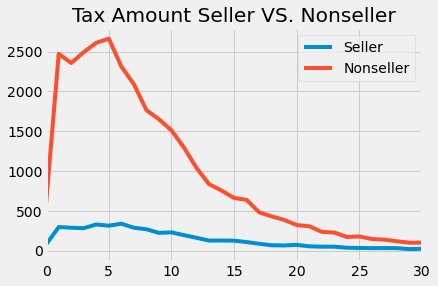

In [126]:
plt.xlim(0,30)
plt.plot(taxamtsellergroup['Did it sell?'], label="Seller")
plt.plot(taxamtnonsellergroup['Did it sell?'], label="Nonseller")
plt.plot(xcord)
plt.title("Tax Amount Seller VS. Nonseller")
plt.legend(loc="upper right")
plt.show()

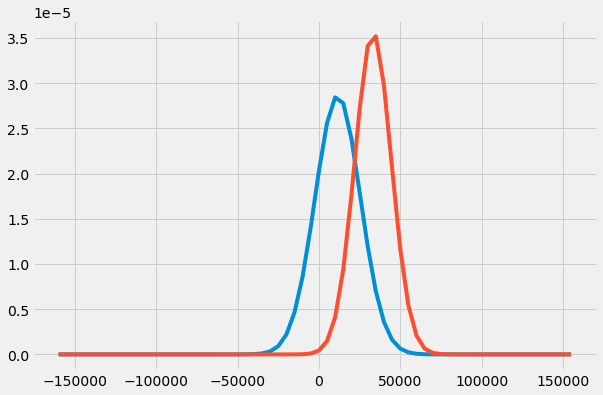

In [69]:
x = np.arange(-160000, 160000, 5000)
#create range of y-values that correspond to normal pdf with mean=0 and sd=1 
y = norm.pdf(x,11588,13936)
q = norm.pdf(x,33273,11201)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y, label='seller')
ax.plot(x,q, label='non_seller')

In [29]:
## Compare SQRFT